In [7]:
from numpy import mean
from numpy import std, cov
from numpy.random import randn
from numpy.random import seed
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Introducción

Es posible que cuando trabajamos con un conjunto de datos, existan ralaciones complejas y desconocidas entre las variables que componen nuestro conjunto de datos. Es muy importante conocer y cuantificar el grado en el cual variables de nuestro conjunto de datos son dependientes entre si. Este conocimiento puede ayudar a preparar nuestros datos para cumplir con las expectativas del algortimo, por ejemplo, la regresión lineal ve mermado su rendimiento con la presencia de estas variables dependientes.

# Correlación

Las variables en un conjunto de datos pueden estar relaccionadas por múltiples razones:

* Un variable podría depender de los valores de otra variable.

* Una variable podría estar altamente/ligeramente asociada con otra variable.

* Dos variables podrían depender de una tercera variable desconocida.

Puede ser útil en el análisis de datos y en la modelización comprender mejor la relación entre variables. La relación estadística entre dos variables es conocida como correlación. Una correlación puede ser positiva, lo que significa que las dos variables se mueven en la misma dirección, negativa, lo que significa que mientras una variable aumenta la otra decrece o incluso nula lo que significa que no existe relación entre dichas variables.

El rendimiento de algunos algoritmos puede verse deteriorado si dos o más variables están altamente relacionadas, esto es conocido como multicolinealidad. Dependiendo de lo que sepamos sobre la relación y sobre la distribució de las variables, se pueden calcular diferentes parámetros que midan el nivel de correlación.

# Preparación de datos

Antes de ver los diferentes métodos de correlación, vamos a definir un conjunto de datos que usaremos para testear los diferentes métodos. Vamos a generar dos muestras de dos variables que tienen una correlación positiva bastante fuerte.

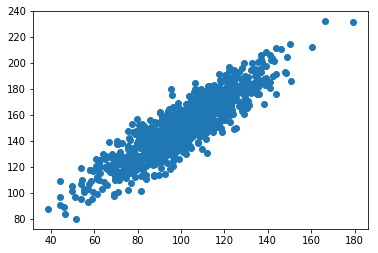

In [5]:
#Fijamos la semilla
seed(1)

#Generamos una muestra de datos extraida de una distribución gaussiana de media 100 y desviación 20
data1 = 20*randn(1000) + 100

#Generamos una misma muestra con ruido gausssiano 
data2 = data1 + (10*randn(1000) + 50)

#Vemos los resultados
plt.scatter(data1, data2)
plt.show()

# Covarianza

Las variables pueden estar relaccionadas de forma lineal. Este tipo de relación es constantemente aditiva en las dos muestras de datos. Esta relación puede ser resumida, mediante la covarianza.

La covarianza se calcula como el promedio del producto entre los valores de cada muestra, donde los valores se han centrado (se les ha restado la media):

$$cov(x,y) = \frac{1}{n}\sum(x_{i} - mean(x))(y_{i}-mean(y))$$

El uso de la media en el cálculo sugiere que es necesario que cada una de las muestras de datos sea o tenga una distribución Gaussiana. El signo de la covarianza puede ser interpretrado como que dos variables cambian en la misma dirección (positiva) o cambian en diferentes direcciones (negativo). La magnitud de la covarianza no es fácil de interpretar. Un valor de 0 en la covarianza indica que ambas variables son completamente independientes.

Numpy dispone de la función **cov()** que puede ser usada para calcular la matriz de covarianza entre dos o más variables. La diagonal principal de la matriz contiene la covarianza de cada variable consigo misma. Los otros valores en la matriz representan la covarianza entre las variables.

In [6]:
#Calculamos la covarianza entre las dos variables calculadas en el apartado anterior
convariance = cov(data1, data2)
print(convariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


La matriz de convarianza se trata de una herramienta ampliamante usada para los análisis estadísticos y análisis con múltivariables para caracterizar las relaciones entre dos o más variables. En la matriz anterior podemos ver que la covarianza entre las dos variables es de 389, este valor positivo nos indica que las variables cambian en la misma dirección.

Un problema que tenemos con la covarianza como herramienta estadística es que su valor numérico es muy dificil de interpretar, es por esto que otra herramienta usada es el coeficiente de Pearson.

# Correlación de Pearson 

El coeficiente de correlación de Pearson (llamado Karl Pearson) puede ser usado para resumir la fuerza de la realación lineal entre dos variables. El coeficiente de correlación de Pearson es calculado como la covarianza de dos variables dividida por el producto de la desviación estándar de cada muestra. Se trata de la normalización de la covarianza entre dos variables para obtener un score interpretable:

$$Pearson's = \frac{cov(x,y)}{stdev(x)stdev(y)}$$

El uso de la media y de la desviación estándar en el cálculo sugiere la necesidad de que las dos muestras de datos tengan una distribución Gaussiana o aproximadamente Gaussiana. El coeficiente retorna un valor entre -1 y 1, que representa los límites de correlación desde un punto de vista negativo o positivo. Un valor de 0 significa no correlación. Los valores deben ser interpretables, valores por debajo de -0.5 o por encima de 0.5 indican una correlación notable, y valores por encima de -0.5 y por debajo de 0.5 sugieren una menor correlación. La correlación de Pearson es una hipótesis estadística que asume que no hay relación entre dos muestras (hipótesis nula). El p-valor puede ser interpretado como:

* **p-valor < alpha:** resultado significativo, rechazamos la hipótesis nula.

* **p-valor > alpha:** resultado no significativo, no podemos rechazar la hipótesis nula.

Scipy dispone de la función **pearsonr()** que puede ser usada para calcular la correlación entre dos muestras de datos que tenga la misma longitud.

In [13]:
#Calculamos la correlación entre las muestras de datos anteriormente calculadasç
corr, p = pearsonr(data1, data2)

#Mostramos la correlación de pearson
print('Pearson correlation: {}'.format(corr))

#Vemos si superamos el test con un nivel de significancia de 0.05
alpha = 0.05

if p < alpha:
    print('Significative correlation')
else:
    print('No significative correlacion')

Pearson correlation: 0.8876119085795312
Significative correlation
